# ch04.03. 분류문제 EDA - penguins
---
* 날짜: 2022.05.11
* 이름: 윤태우

## 학습내용
    - penguins 데이터 EDA
    - 분류문제 에서의 탐색적 데이터 분석 진행


## 라이브러리 및 데이터 로드
---

* 라이브러리 불러오기

In [1]:
# 데이터 분석을 위한 pandas 라이브러리를 불러옵니다.
# 수치계산을 위한 numpy를 불러옵니다.
# 데이터 시각화를 위한 matplotlib, seaborn 을 불러옵니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* seaborn에서 제공하는 `penguins` 데이터셋을 불러오기

In [2]:
df = sns.load_dataset('penguins')

* 데이터셋 일부 확인

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## 데이터 기본 확인
---

### **| 결측치 확인**

* 결측지 개수 확인

In [4]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

* 결측지 비율 확인

In [5]:
df.isnull().sum()/len(df)*100

species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
dtype: float64

### **| 기술통계**

* `info` 이용해 데이터 확인

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


* 숫자 자료형의 기술 통계

In [7]:
nums = list(df.describe().columns)
df[nums].describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


* 숫자 자료형 외의 기술 통계

In [9]:
noms = list(df.describe(include = 'object').columns)
df[noms].describe()

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,152,168,168


* 숫자 자료형 외 값 및 개수 확인

In [ ]:
for nom in noms :
  print(f'{nom} : {df[nom].value_counts}')

### **| 변수 요약**

* 모든 속성의 분포 간단히 그리기

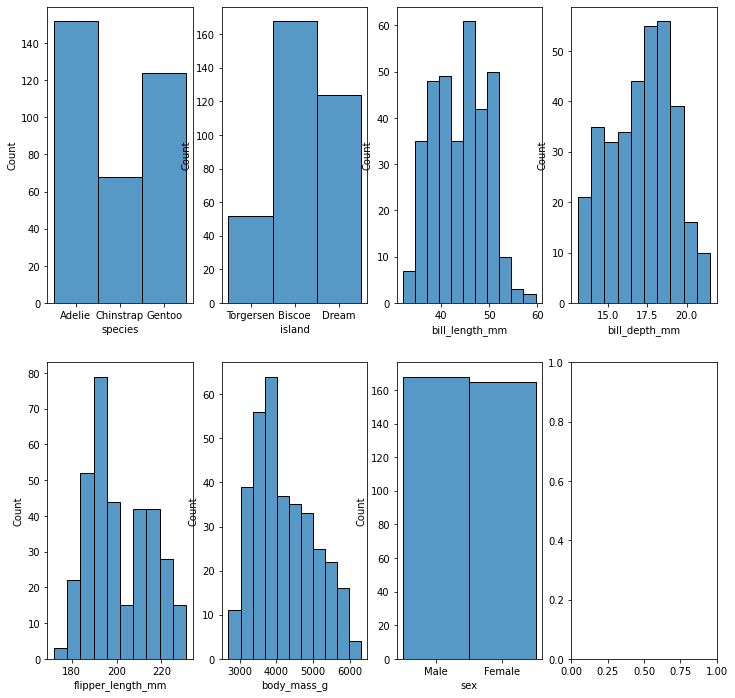

In [10]:
f, axes = plt.subplots(2,4, figsize = (12,12))
axes = axes.flatten()
for col, ax in zip(df.columns, axes) :
  sns.histplot(data = df, x=col, ax=ax)
plt.show()

* 자료형 정리하기

In [11]:
print('연속형 자료', nums)
print('범주 / 이산 자료', noms)
print('예측할 범주 : species(종)에 따른 특성')
print('추가 전처리가 필요한 속성 : sex, island, species')

연속형 자료 ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
범주 / 이산 자료 ['species', 'island', 'sex']
예측할 범주 : species(종)에 따른 특성
추가 전처리가 필요한 속성 : sex, island, species


* 데이터 정리하기
  * 데이터 소개: 펭귄의 species(종)과 거주 환경에 따른 특성
* 자료형 소개 :
  - species 종 
  - island 거주 섬
  - bill_length_mm 부리 길이
  - bill_depth_mm 부리 깊이
  - flipper_length_mm 팔(날개) 길이
  - body_mass_g 몸무게
  - sex 성별
 
* 모델링을 위한 자료형 구분:
  
 - 연속형 자료 ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

 - 범주 / 이산 자료 ['species', 'island', 'sex']


## 데이터 분포
---

### **| 데이터 분포 시각화**

* 연속 자료형 분포 그리기

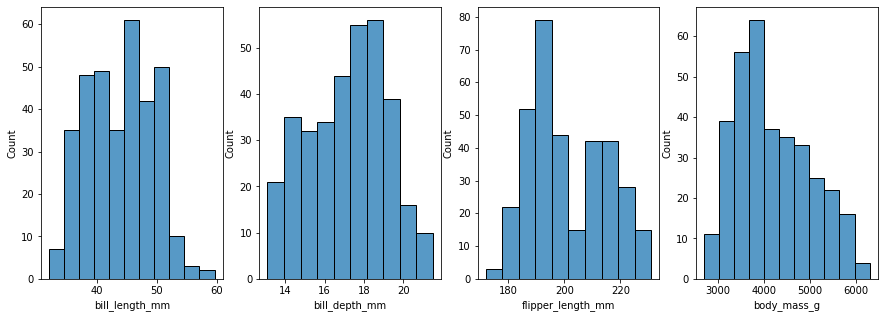

In [14]:
f, axes = plt.subplots(1,len(nums), figsize = (15,5))

for num, ax in zip(nums, axes) :
  sns.histplot(data = df, x = num, ax = ax)
plt.show()

* 이산 자료형 분포 그리기

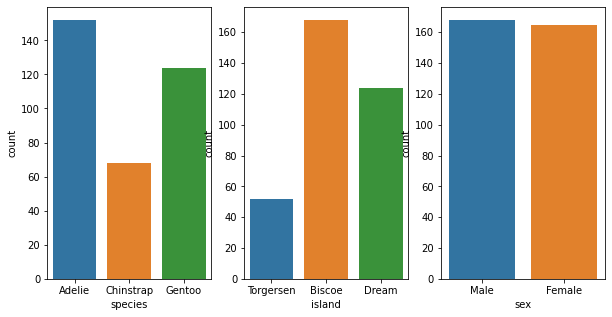

In [23]:
f, axes = plt.subplots(1,len(noms), figsize = (10,5))

for nom, ax in zip(noms, axes) :
  sns.countplot(data = df, x = nom, ax = ax)
plt.show()

### | **기술 통계량 시각화**

* 기술통계량 확인

In [17]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


* boxplot 으로 연속 자료형 기술 통계 시각화하기

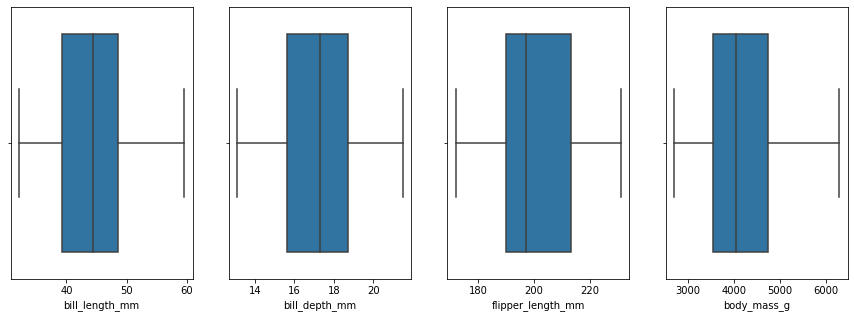

In [19]:
f, axes = plt.subplots(1,len(nums), figsize=(15,5))
axes = axes.flatten()
for num, ax in zip(nums, axes) :
  sns.boxplot(data = df[nums], x = num, ax = ax)
plt.show()

* viloinplot 으로 연속 자료형 기술 통계 시각화하기

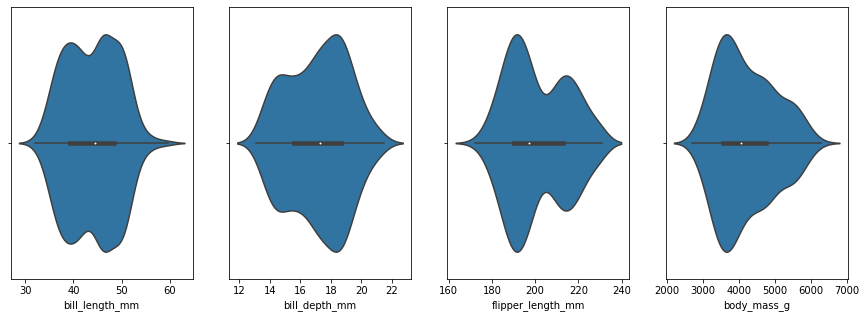

In [20]:
f, axes = plt.subplots(1,len(nums), figsize=(15,5))
axes = axes.flatten()
for num, ax in zip(nums, axes) :
  sns.violinplot(data = df[nums], x = num, ax = ax)
plt.show()

### **| 왜도와 첨도**

* `skew` 이용해 왜도 구하기

In [21]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


bill_length_mm       0.053118
bill_depth_mm       -0.143465
flipper_length_mm    0.345682
body_mass_g          0.470329
dtype: float64

* `kurt` 이용해 첨도 구하기

In [22]:
df.kurt()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


bill_length_mm      -0.876027
bill_depth_mm       -0.906866
flipper_length_mm   -0.984273
body_mass_g         -0.719222
dtype: float64

### **| 예측값에 대한 추가 시각화**

* `countplot`으로 그리기


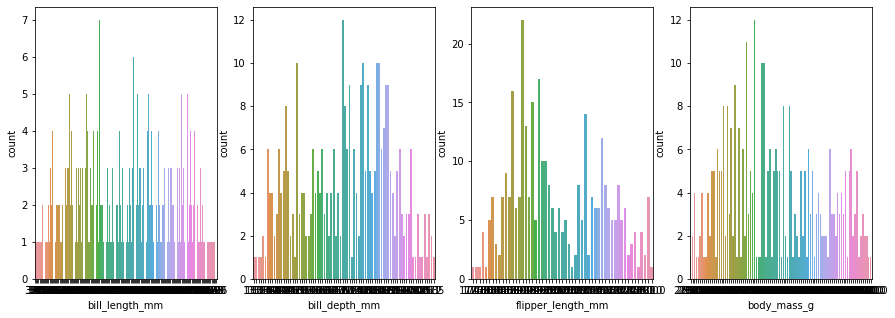

In [29]:
f, axes = plt.subplots(1,len(nums), figsize = (15,5))

for num,ax in zip(nums, axes) :
  sns.countplot(data = df, x = num, ax = ax)
plt.show()

# 연속형 자료형은 countplot을 쓰기에 적절치 않다.

* `hue` 옵션에 범주형 속성 추가하기

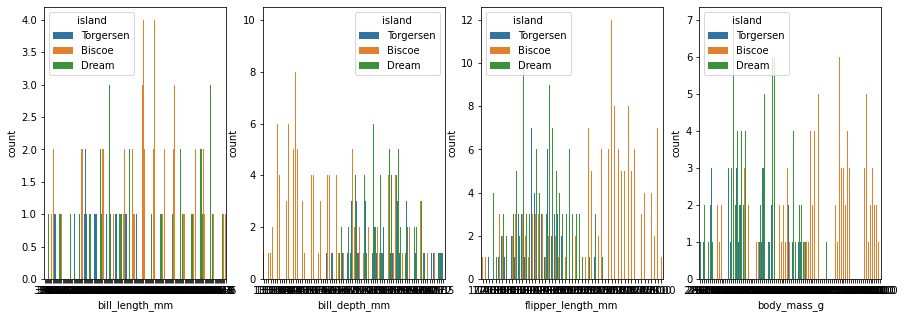

In [30]:
f, axes = plt.subplots(1,len(nums), figsize = (15,5))

for num,ax in zip(nums, axes) :
  sns.countplot(data = df, x = num, ax = ax, hue = 'island')
plt.show()


## 속성간 관계 파악
---

### **| 상관분석**

* `corr`를 이용해 상관계수 구하기

In [31]:
df.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


* `style.background_gradient` 이용해 상관계수 시각화 하기

In [32]:
df.corr().style.background_gradient(cmap = 'Greens')

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


* `heatmap` 이용해 상관계수 시각화 하기

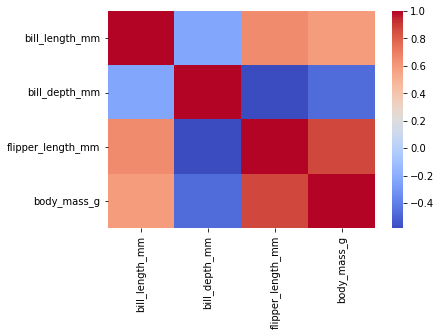

In [36]:
sns.heatmap(data = df.corr(), cmap = 'coolwarm')

* 상관관계가 높은 속성 정리하기




In [37]:
# body_mass_g(몸무게)와 flipper_length_mm (날개 길이)의 관계가 큼
# -> 몸무게가 무거울수록 날개 길이가 길다.
# fliffer_length_mm(날개 길이)와 bill_depth_mm(부리 깊이)의 관계가 큼
# -> 날개길이가 길수록 부리가 얕다

### **| 속성간 관계 시각화**

* `pairplot` 이용해 시각화 하기 

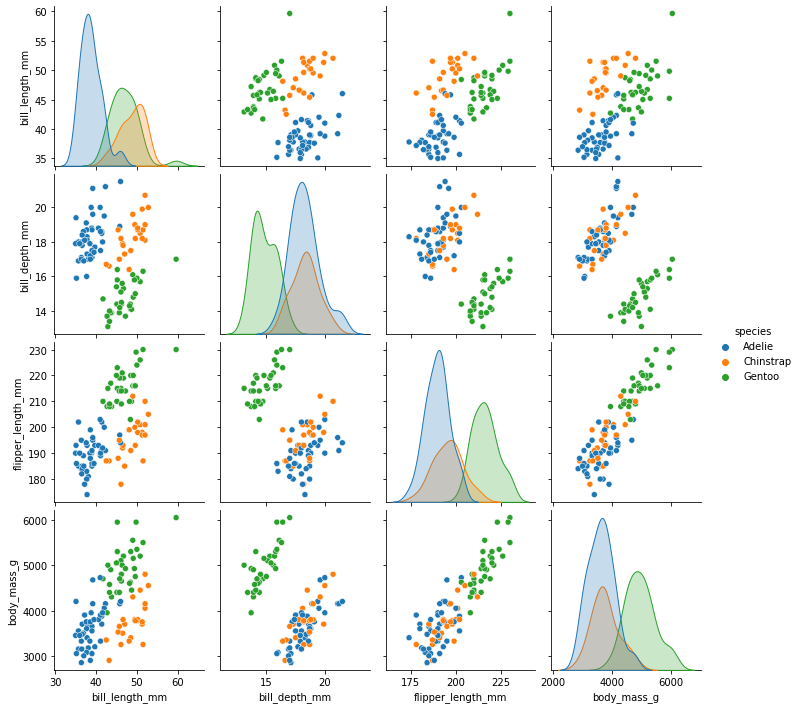

In [39]:
# pairplot 은 시간이 오래 걸리기 때문에 일부 샘플을 추출해 그리는게 좋습니다.
sns.pairplot(df.sample(100), hue = 'species')

* `kdeplot` 이용해 연속 자료형 별 예측값의 분포 시각화 하기

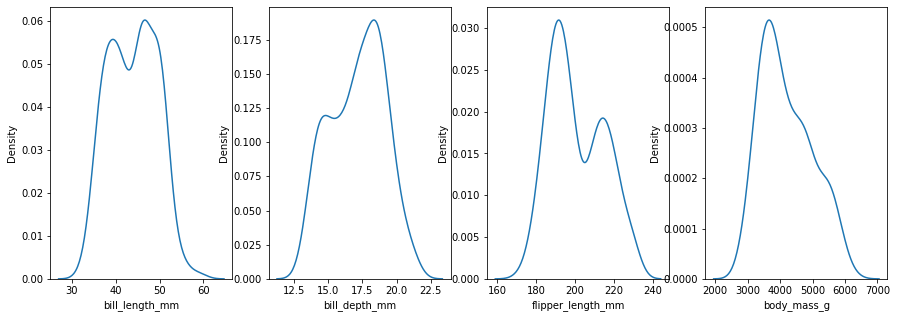

In [46]:
f,axes = plt.subplots(1,len(nums), figsize = (15,5))

for num,ax in zip(nums, axes):
  sns.kdeplot(data = df[nums], x = num, ax = ax)

plt.show()


<Figure size 216x216 with 0 Axes>

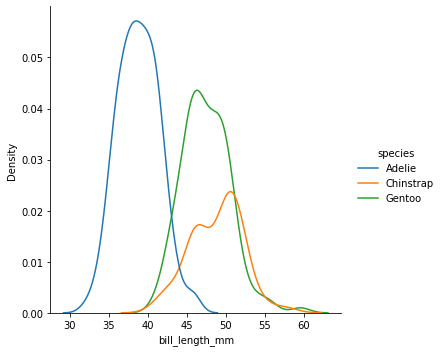

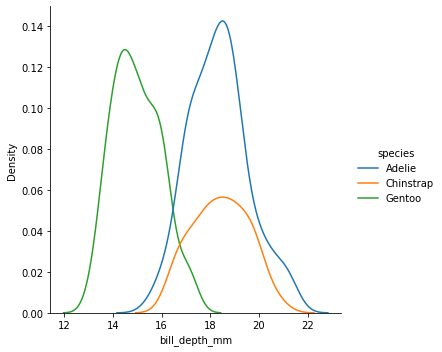

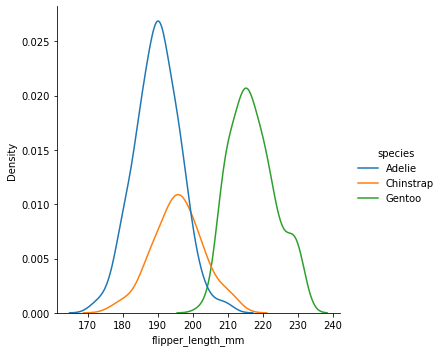

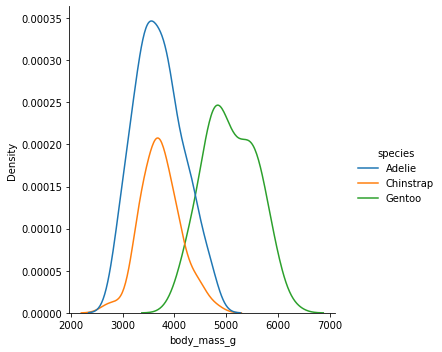

In [79]:
plt.figure(figsize = (3,3))
for col in nums:
  sns.displot(data=df, x=col, hue='species', kind='kde')
  plt.show()

* 위에서 그린 플롯에 `col` 옵션으로 `island` 추가하기

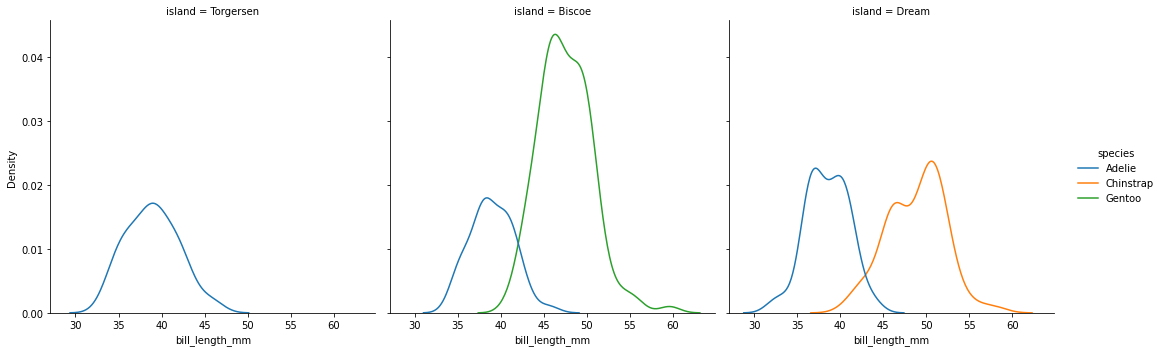

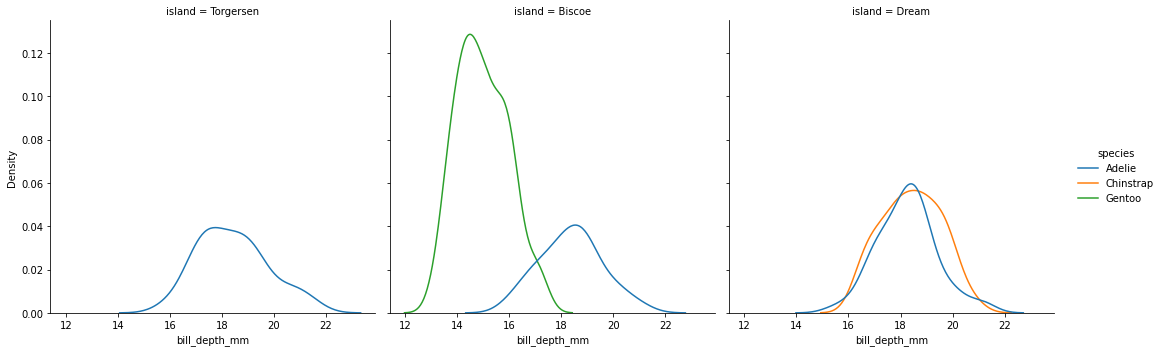

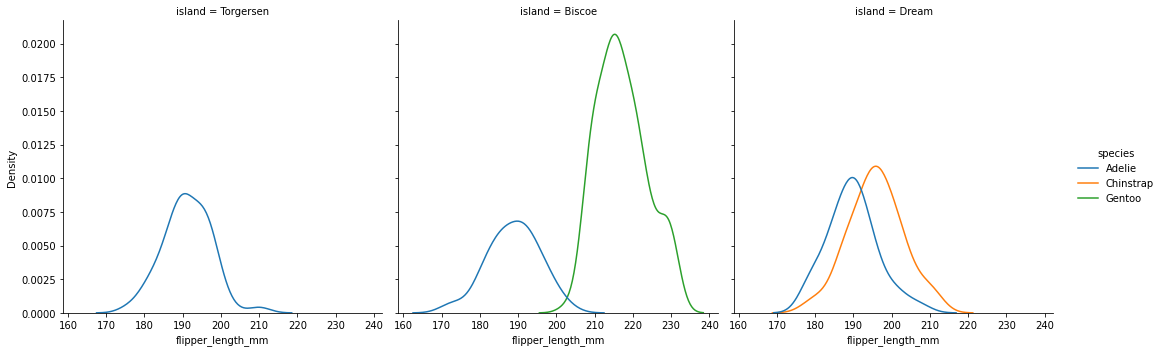

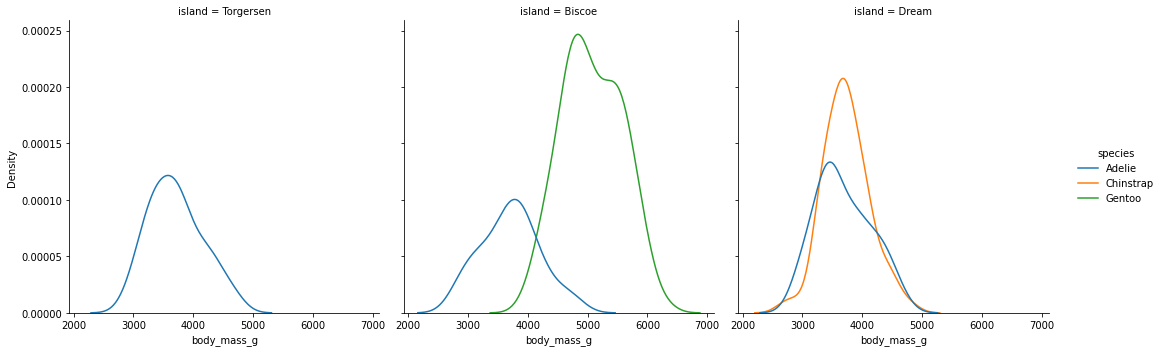

In [81]:
for col in nums:
  sns.displot(data=df, x=col, hue='species', kind='kde', col='island')
  plt.show()

* `bill_length_mm`과 `bill_depth_mm`의 산점도를 그리고 `hue`옵션에 예측값 추가하기

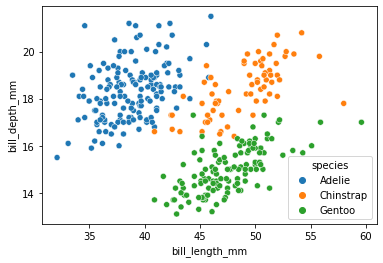

In [85]:
sns.scatterplot(data = df, x = df['bill_length_mm'], y = df['bill_depth_mm'], hue = 'species')

* `lmplot`을 이용해 위의 산점도를 다시 그리고 `col` 옵션에 `island` 추가하기

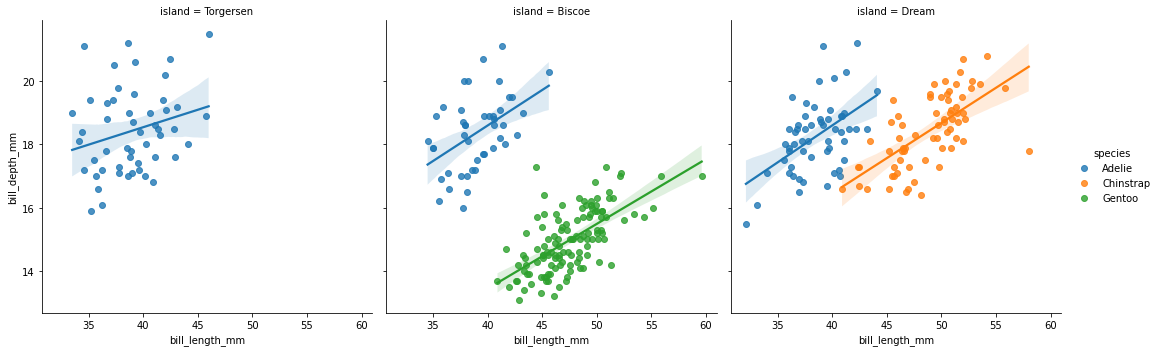

In [96]:
sns.lmplot(data = df, x='bill_length_mm', y = 'bill_depth_mm', hue = 'species', col = 'island')
plt.show()


* `flipper_length_mm`, `body_mass_g`의 산점도를 그리고 `hue`옵션에 예측값 추가하기

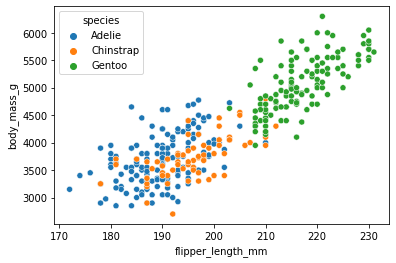

In [94]:
sns.scatterplot(data = df, x = df['flipper_length_mm'], y = df['body_mass_g'], hue = 'species')

* `lmplot`을 이용해 위의 산점도를 다시 그리고 `col` 옵션에 `island` 추가하기

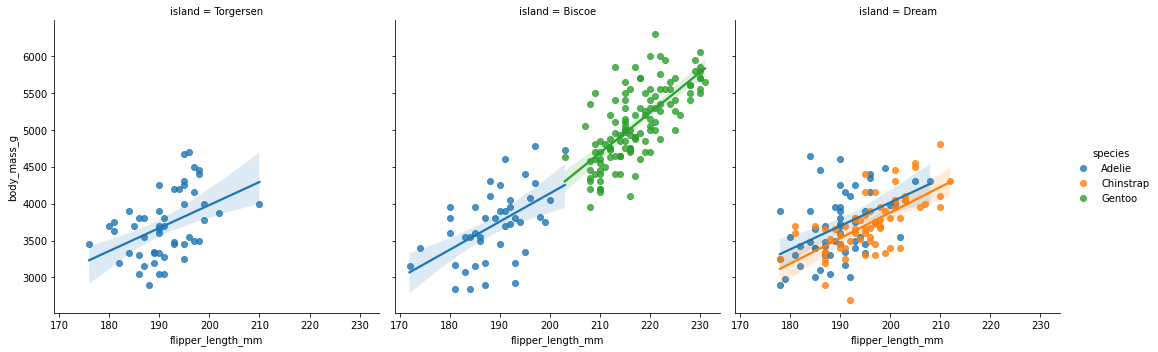

In [95]:
sns.lmplot(data = df, x='flipper_length_mm', y = 'body_mass_g', hue = 'species', col = 'island')
plt.show()


* `histplot`으로 범주형 속성들과 예측값 히트맵 그리기

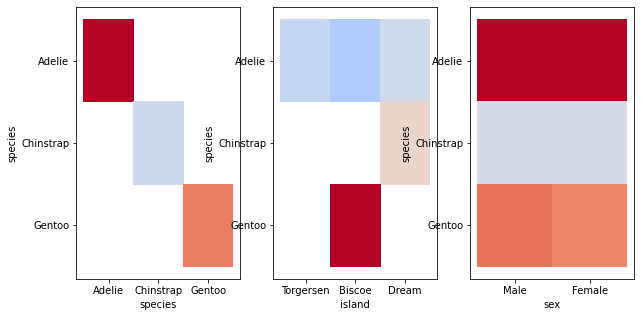

In [103]:
f, axes = plt.subplots(1,len(noms), figsize = (10,5))
for nom, ax in zip(noms, axes) :
  sns.histplot(data = df, x = nom, y='species', ax = ax, cmap = 'coolwarm')